# Proyecto de Estadística Matemática

Estudiamos posibles causas sociales que generan sesgo en el puntaje del examen Saber11 por diferencia de género. 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [103]:
# Importa datos 
datos = pd.read_csv('datos_SPP.csv') 
#'beneficiario_spp'
df = datos.filter(['puntaje_saber11', 'mujer', 'edad', 'minoria', 'miembros_familia','col_privado','icfes_educ_madre', 'estrato'])
df = df.dropna()
educ_madre = {'Primaria': 1, 'Secundaria': 2, 'Tecnica': 3, 'Universitaria':4}
df = df.replace(educ_madre)

df['mujer*edad'] = df['mujer']*df['edad']
df['mujer*minoria'] = df['mujer']*df['minoria']
#df['mujer*beneficiario_spp'] =  df['mujer']*df['beneficiario_spp']
df['mujer*miembros_familia'] = df['mujer']*df['miembros_familia']
df['mujer*col_privado'] = df['mujer']*df['col_privado']
df['mujer*icfes_educ_madre'] = df['mujer']*df['icfes_educ_madre']
df['mujer*estrato'] = df['mujer']*df['estrato']



## Histograma de la población

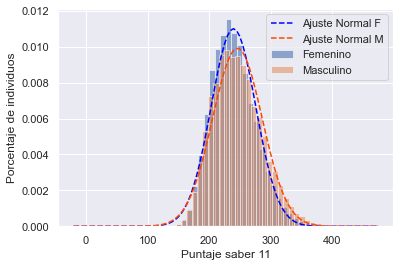

In [104]:
# Separa población entre hombres y mujeres
mujeres = df.loc[df['mujer'] == 1]
hombres = df.loc[df['mujer'] == 0]

# Ajustamos una normal a los puntajes del saber11
muMujer, stdMujer = sp.norm.fit(mujeres["puntaje_saber11"])
muHombre, stdHombre = sp.norm.fit(hombres["puntaje_saber11"])

# Realizamos un histograma entre ambas poblaciones
sns.set()
plt.hist(mujeres["puntaje_saber11"], bins=50, density=True, alpha=0.6, label = 'Femenino')
plt.hist(hombres["puntaje_saber11"], bins=50, density=True, alpha=0.5, label = 'Masculino')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pMujer = sp.norm.pdf(x, muMujer, stdMujer)
pHombre = sp.norm.pdf(x, muHombre, stdHombre)
plt.plot(x, pMujer, 'k', linewidth=1.5, c= 'blue', ls='--' ,label='Ajuste Normal F')
plt.plot(x, pHombre, 'k', linewidth=1.5, c = 'orangered', ls='--' ,label = 'Ajuste Normal M')
plt.xlabel("Puntaje saber 11")
plt.ylabel("Porcentaje de individuos")
plt.legend()
plt.show()

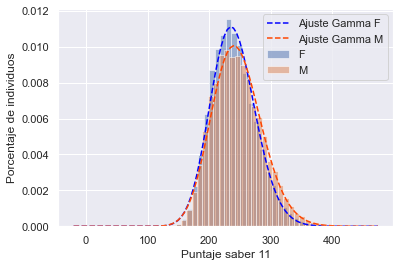

In [105]:

# Ajustamos una normal a los puntajes del saber11
fit_alphaM, fit_locM, fit_betaM= sp.gamma.fit(mujeres["puntaje_saber11"])
fit_alphaH, fit_locH, fit_betaH= sp.gamma.fit(hombres["puntaje_saber11"])

# Realizamos un histograma entre ambas poblaciones
plt.hist(mujeres["puntaje_saber11"], bins=50, density=True, alpha=0.5, label = 'F')
plt.hist(hombres["puntaje_saber11"], bins=50, density=True, alpha=0.5, label = 'M')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pMujer = sp.gamma.pdf(x, fit_alphaM, loc=fit_locM , scale=fit_betaM)
pHombre = sp.gamma.pdf(x, fit_alphaH, loc=fit_locH , scale=fit_betaH)
plt.plot(x, pMujer, 'k', linewidth=1.5, c= 'blue', ls='--' ,label='Ajuste Gamma F')
plt.plot(x, pHombre, 'k',linewidth=1.5, c = 'orangered', ls='--' ,label = 'Ajuste Gamma M')
plt.xlabel("Puntaje saber 11")
plt.ylabel("Porcentaje de individuos")
plt.legend()
plt.show()

In [118]:
# Parametros gamma
print("Parametros mujeres", fit_alphaM, fit_locM, fit_betaM)
print("Parametros hombres", fit_alphaH, fit_locH, fit_betaH)


Parametros mujeres 80.23273956111242 -83.8782179989694 4.029190362311903
Parametros hombres 49.26659873594449 -34.96735078740876 5.699340547831303


In [106]:
#Diferencia promedio de notas 
hombres["puntaje_saber11"].mean()  - mujeres["puntaje_saber11"].mean() 

6.424867670813455

## Modelo lineal

In [107]:
#'mujer*beneficiario_spp'
X1 = df.drop(['puntaje_saber11','mujer*edad', 'mujer*minoria', 'mujer*miembros_familia', 'mujer*col_privado', 'mujer*icfes_educ_madre',
       'mujer*estrato'], axis=1)
X2 = df.drop('puntaje_saber11',axis=1)
Y = df['puntaje_saber11']

# Dos modelos a comparar
modelo1 = LinearRegression()
modelo2 = LinearRegression()
modelo1.fit(X1, Y);
modelo2.fit(X2, Y);

In [109]:
# Coeficientes de ambos modelos
print('Modelo 1: \n','Intercept:', modelo1.intercept_, '\n Coefficients:', modelo1.coef_, '\n R2:', modelo1.score(X1,Y))
print('\n','Modelo 2: \n','Intercept:', modelo2.intercept_, '\n Coefficients:', modelo2.coef_, '\n R2:', modelo2.score(X2,Y))

Modelo 1: 
 Intercept: 255.7281393867061 
 Coefficients: [-4.79793825 -1.8625222  -8.4125385  -1.23896586 -4.84960744  8.50896596
 10.00755389] 
 R2: 0.16533223936918084

 Modelo 2: 
 Intercept: 258.281720892122 
 Coefficients: [-8.20152373 -2.01821538 -9.34789187 -1.38528141 -6.58341488  8.26495588
 11.10057696  0.21317778  1.59966664  0.24913373  3.08113701  0.4102354
 -1.9119592 ] 
 R2: 0.1659897466329363


In [110]:
print('Hay una disminución porcentual en el sesgo del', np.abs((modelo2.coef_[0]-modelo1.coef_[0])/modelo1.coef_[0]))

Hay una disminución porcentual en el sesgo del 0.7093850088069483


In [111]:
X2.columns

Index(['mujer', 'edad', 'minoria', 'miembros_familia', 'col_privado',
       'icfes_educ_madre', 'estrato', 'mujer*edad', 'mujer*minoria',
       'mujer*miembros_familia', 'mujer*col_privado', 'mujer*icfes_educ_madre',
       'mujer*estrato'],
      dtype='object')

## Cálculos Adicionales

Podemos estudiar por separado el sesgo de género entre colegios públicos y privados

In [119]:
colPrivado = (df.loc[df['col_privado']==1]).drop(['col_privado','mujer*col_privado'], axis=1)
colPublico = (df.loc[df['col_privado']==0]).drop(['col_privado','mujer*col_privado'], axis=1)
mujeresPriv = df.loc[(df['mujer'] == 1) & (df['col_privado']==1)]
hombresPriv = df.loc[(df['mujer'] == 0) & (df['col_privado']==1)]
mujeresPubli = df.loc[(df['mujer'] == 1) & (df['col_privado']==0)]
hombresPubli = df.loc[(df['mujer'] == 0) & (df['col_privado']==0)]

print("Mujeres colegio privado \n Promedio: ", mujeresPriv["puntaje_saber11"].mean(), "\n Std :", mujeresPriv["puntaje_saber11"].std())
print("Hombres colegio privado \n Promedio: ", hombresPriv["puntaje_saber11"].mean(),"\n Std :", hombresPriv["puntaje_saber11"].std())
print("Mujeres colegio público \n Promedio: ", mujeresPubli["puntaje_saber11"].mean(), "\n Std :", mujeresPubli["puntaje_saber11"].std())
print("Hombres colegio público \n Promedio: ", hombresPubli["puntaje_saber11"].mean(),"\n Std :", hombresPubli["puntaje_saber11"].std())

Mujeres colegio privado 
 Promedio:  238.5417215556202 
 Std : 40.94730617286992
Hombres colegio privado 
 Promedio:  244.66017654158958 
 Std : 44.49702571003403
Mujeres colegio público 
 Promedio:  239.54402426396007 
 Std : 35.35791473580181
Hombres colegio público 
 Promedio:  246.04344497019426 
 Std : 39.343678377865054


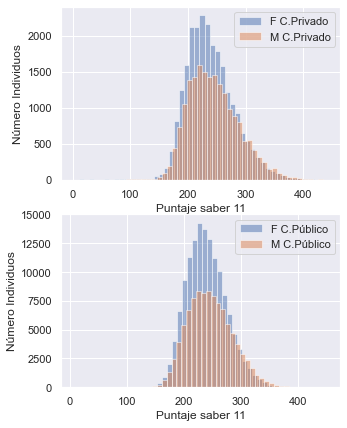

In [120]:
f, ax = plt.subplots(2,1, figsize = (5,7))
ax[0].hist(mujeresPriv["puntaje_saber11"], bins=50, alpha=0.5, label = 'F C.Privado')
ax[0].hist(hombresPriv["puntaje_saber11"], bins=50, alpha=0.5, label = 'M C.Privado')
ax[1].hist(mujeresPubli["puntaje_saber11"], bins=50, alpha=0.5, label = 'F C.Público')
ax[1].hist(hombresPubli["puntaje_saber11"], bins=50, alpha=0.5, label = 'M C.Público')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("Puntaje saber 11")
ax[0].set_ylabel("Número Individuos")
ax[1].set_xlabel("Puntaje saber 11")
ax[1].set_ylabel("Número Individuos")
plt.show()

Vemos que la diferencia entre las medias de ambas poblaciones se ve afectada significativamente, así podemos conllevar el estudio anterior para colegios públicos y privados por separado.

In [121]:
#Para colegio privado
X1Priv = colPrivado.drop(['puntaje_saber11','mujer*edad', 'mujer*minoria', 'mujer*miembros_familia', 'mujer*icfes_educ_madre',
       'mujer*estrato'], axis=1)
X2Priv = colPrivado.drop('puntaje_saber11',axis=1)
YPriv = colPrivado['puntaje_saber11']

# Dos modelos a comparar
modelo1Priv = LinearRegression()
modelo2Priv = LinearRegression()
modelo1Priv.fit(X1Priv, YPriv);
modelo2Priv.fit(X2Priv, YPriv);

#Coeficientes de ambos modelos
print('Modelo 1 Priv: \n','Intercept:', modelo1Priv.intercept_, '\n Coefficients:', modelo1Priv.coef_, '\n R2:', modelo1Priv.score(X1Priv,YPriv))
print('\n','Modelo 2 Priv: \n','Intercept:', modelo2Priv.intercept_, '\n Coefficients:', modelo2Priv.coef_, '\n R2:', modelo2Priv.score(X2Priv,YPriv))

Modelo 1 Priv: 
 Intercept: 230.51702106509296 
 Coefficients: [-2.75855412 -1.40538583 -6.18363205 -0.63124292 12.94352598  9.55884191] 
 R2: 0.23189220542921107

 Modelo 2 Priv: 
 Intercept: 229.26920993464572 
 Coefficients: [-0.60088801 -1.38791694 -7.01502135 -0.52927644 13.1185413   9.65497679
 -0.02802971  1.46077588 -0.17898177 -0.32028201 -0.16649168] 
 R2: 0.2319380137811693


In [126]:
#Para colegio publico
X1Publi = colPublico.drop(['puntaje_saber11','mujer*edad', 'mujer*minoria', 'mujer*miembros_familia', 'mujer*icfes_educ_madre',
       'mujer*estrato'], axis=1)
X2Publi = colPublico.drop('puntaje_saber11',axis=1)
YPubli = colPublico['puntaje_saber11']

# Dos modelos a comparar
modelo1Publi = LinearRegression()
modelo2Publi = LinearRegression()
modelo1Publi.fit(X1Publi, YPubli);
modelo2Publi.fit(X2Publi, YPubli);

#Coeficientes de ambos modelos
print('Modelo 1 Publi: \n','Intercept:', modelo1Publi.intercept_, '\n Coefficients:', modelo1Publi.coef_, '\n R2:', modelo1Publi.score(X1Publi,YPubli))
print('\n','Modelo 2 Publi: \n','Intercept:', modelo2Publi.intercept_, '\n Coefficients:', modelo2Publi.coef_, '\n R2:', modelo2Publi.score(X2Publi,YPubli))

Modelo 1 Publi: 
 Intercept: 261.2506609792807 
 Coefficients: [-5.18785672 -2.03595993 -8.6354047  -1.3344312   7.50855023  9.95933925] 
 R2: 0.1523045889747009

 Modelo 2 Publi: 
 Intercept: 265.6886212199679 
 Coefficients: [-11.15187151  -2.30817931  -9.5521884   -1.52082615   7.09621675
  11.30729499   0.3753514    1.57116938   0.31613483   0.68312574
  -2.34730238] 
 R2: 0.15315677782916826


En los colegios públicos, quitando los factores sociales que nos permiten los datos, a las mujeres les va mejor que a los hombres en las pruebas Saber11

In [123]:
X2Publi.columns

Index(['mujer', 'edad', 'minoria', 'miembros_familia', 'icfes_educ_madre',
       'estrato', 'mujer*edad', 'mujer*minoria', 'mujer*miembros_familia',
       'mujer*icfes_educ_madre', 'mujer*estrato'],
      dtype='object')

In [124]:
# df2 = datos.filter(['mujer', 'edad', 'minoria', 'beneficiario_spp', 'miembros_familia','col_privado','icfes_educ_madre', 'estrato'])
# df2 = df2.dropna()
# educ_madre = {'Primaria': 1, 'Secundaria': 2, 'Tecnica': 3, 'Universitaria':4}
# df2 = df2.replace(educ_madre)
# sns.pairplot(df2, hue="mujer")

(array([1.41954e+05, 0.00000e+00, 7.67790e+04, 0.00000e+00, 1.87000e+04,
        0.00000e+00, 9.52000e+02, 0.00000e+00, 1.05000e+02, 5.60000e+01]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

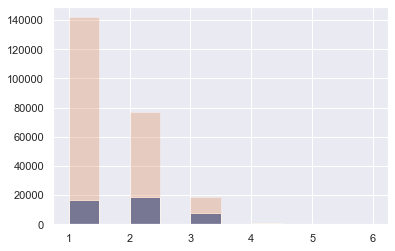

In [131]:
plt.hist(colPrivado["estrato"])
plt.hist(colPublico["estrato"],alpha=0.3)